In [1]:
# libraries
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
# Identify the shape of each image
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [3]:

LEFT, RIGHT, TOP, BOTTOM = (300, 600, 25, 325)
# font
font = cv2.FONT_HERSHEY_COMPLEX

# directory of train / valid data
path = 'C:/Users/Akash/Downloads/rps-cv/data/'

frame_counter= 0

In [4]:
class_type = "train"#train/valid
class_num = 0 # 0->Rock, 1->Paper, 2->Scissors

In [5]:
if class_type == 'train':
    data_images = 1000
else:
    data_images = 100

In [6]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
        filename = 'img' + str((frame_counter - 120)) + '.png'
        path_name = path + class_type + '/' + str(class_num) + '/' + filename
        print(path_name)

        ret, read_screen = cap.read()
        read_screen = cv2.flip(read_screen,1)
        cv2.rectangle(read_screen, (LEFT, TOP), (RIGHT, BOTTOM), (150, 0, 0), 5)
        cv2.imshow("Live Feed", read_screen)

        roi = read_screen[TOP:BOTTOM, LEFT:RIGHT]
        gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray, (5, 5), 0)

        ret, threshold = cv2.threshold(blur, 70, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
        cv2.namedWindow("Area of interest")
        cv2.moveWindow("Area of interest", 1000, 200)
        cv2.imshow("Area of interest", threshold)

            
        if frame_counter < 120:
            cv2.putText(read_screen, 'waiting...', (10, 450), font, 1, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.imshow('Live Feed', read_screen)  
        else:
            cv2.putText(read_screen, 'Recording started!', (10, 450), font, 1, (0, 0, 0), 2, cv2.LINE_AA)
            cv2.imshow('Live Feed', read_screen)
            cv2.imwrite(path_name, threshold)

        frame_counter += 1

        # collecting 1k(training) or 100(testing) images
        if frame_counter > data_images + 120:
            break
            
        key = cv2.waitKey(10)
        if key == 27:
            break

C:/Users/Akash/Downloads/rps-cv/data/train/0/img-120.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img-119.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img-118.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img-117.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img-116.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img-115.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img-114.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img-113.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img-112.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img-111.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img-110.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img-109.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img-108.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img-107.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img-106.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img-105.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img-104.png
C:/Users/Akash/Downloads/rps-cv

C:/Users/Akash/Downloads/rps-cv/data/train/0/img28.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img29.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img30.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img31.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img32.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img33.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img34.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img35.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img36.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img37.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img38.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img39.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img40.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img41.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img42.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img43.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img44.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img45.png
C:/Users/A

C:/Users/Akash/Downloads/rps-cv/data/train/0/img176.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img177.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img178.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img179.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img180.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img181.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img182.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img183.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img184.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img185.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img186.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img187.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img188.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img189.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img190.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img191.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img192.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img

C:/Users/Akash/Downloads/rps-cv/data/train/0/img325.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img326.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img327.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img328.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img329.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img330.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img331.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img332.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img333.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img334.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img335.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img336.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img337.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img338.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img339.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img340.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img341.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img

C:/Users/Akash/Downloads/rps-cv/data/train/0/img475.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img476.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img477.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img478.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img479.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img480.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img481.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img482.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img483.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img484.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img485.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img486.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img487.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img488.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img489.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img490.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img491.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img

C:/Users/Akash/Downloads/rps-cv/data/train/0/img624.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img625.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img626.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img627.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img628.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img629.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img630.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img631.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img632.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img633.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img634.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img635.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img636.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img637.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img638.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img639.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img640.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img

C:/Users/Akash/Downloads/rps-cv/data/train/0/img775.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img776.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img777.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img778.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img779.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img780.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img781.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img782.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img783.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img784.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img785.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img786.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img787.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img788.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img789.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img790.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img791.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img

C:/Users/Akash/Downloads/rps-cv/data/train/0/img926.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img927.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img928.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img929.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img930.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img931.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img932.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img933.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img934.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img935.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img936.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img937.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img938.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img939.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img940.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img941.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img942.png
C:/Users/Akash/Downloads/rps-cv/data/train/0/img

In [6]:
rock_image = cv2.imread('data/train/0/img100.png')

In [7]:
rock_image = cv2.cvtColor(rock_image,cv2.COLOR_BGR2RGB)

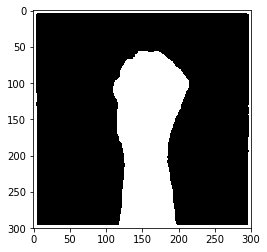

In [8]:
plt.imshow(rock_image)

In [9]:
rock_image.shape

(300, 300, 3)

In [10]:
#prepairing the data
# making it rotation, scale, shift, zoom, shear invariant
image_gen = ImageDataGenerator(width_shift_range=0.1,
                               height_shift_range=0.1,
                               rotation_range=30,
                               rescale=1./255,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               shear_range=0.2,
                               fill_mode='nearest'
                              )

In [11]:
image_gen.flow_from_directory('data/train')

Found 3003 images belonging to 3 classes.


In [27]:
def create_model():
    model = Sequential()

    model.add(Conv2D(32, activation='relu', kernel_size=(3,3),   input_shape=(300,300,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64, activation='relu', kernel_size=(3,3),   input_shape=(300,300,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64, activation='relu', kernel_size=(3,3), input_shape=(300,300,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())

    model.add(Dropout(0.1))

    model.add(Dense(128, activation='relu'))

    model.add(Dropout(0.5))

    model.add(Dense(3, activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
model = create_model()

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

In [33]:
#prepairing training data
train_image_gen = image_gen.flow_from_directory('data/train',
                                                target_size = (300,300),
                                                batch_size = 12,
                                                class_mode='categorical')

Found 3003 images belonging to 3 classes.


In [34]:
train_image_gen.batch_size

12

In [35]:
# prepairing testing data
test_image_gen = image_gen.flow_from_directory('data/valid',
                                                target_size = (300,300),
                                                batch_size = 12,
                                                class_mode='categorical')

Found 303 images belonging to 3 classes.


In [36]:
train_image_gen.class_indices

{'0': 0, '1': 1, '2': 2}

In [58]:
results = model.fit_generator(train_image_gen,
                              epochs=2,
                              steps_per_epoch=50,
                              validation_data = test_image_gen,
                              validation_steps = 3)

Epoch 1/2
50/50 [==============================] - 65s 1s/step - loss: 0.1918 - accuracy: 0.9350 - val_loss: 0.3734 - val_accuracy: 0.8611
Epoch 2/2
50/50 [==============================] - 65s 1s/step - loss: 0.1308 - accuracy: 0.9500 - val_loss: 0.0816 - val_accuracy: 1.0000


In [59]:
# Predicting new images
train_image_gen.class_indices

{'0': 0, '1': 1, '2': 2}

In [60]:
model.save('model_RPS.hdf5')

In [61]:
from keras.models import load_model

In [62]:
model = load_model('model_RPS.hdf5')

In [63]:
rock_file = 'data/valid/0/img0.png'


In [64]:
pred = []
true = []

In [65]:
# Verify rock input
for i in range(101):
    rock_file = f'data/valid/0/img{i}.png'
    rock_img = image.load_img(rock_file, target_size=(300,300))
    rock_img = image.img_to_array(rock_img)
    rock_img = np.expand_dims(rock_img, axis=0)
    rock_img = rock_img/255
    pred.append(model.predict_classes(rock_img)[0])
    true.append(0)

In [66]:
pred, true

([0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

In [67]:
for i in range(101):
    paper_file = f'data/valid/1/img{i}.png'
    paper_img = image.load_img(paper_file, target_size=(300,300))
    paper_img = image.img_to_array(paper_img)
    paper_img = np.expand_dims(paper_img, axis=0)
    paper_img = paper_img/255
    pred.append(model.predict_classes(paper_img)[0])
    true.append(1)

In [68]:
pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1]

In [69]:
len(pred)

202

In [70]:
true

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [71]:
len(true)

202

In [72]:
for i in range(101):
    scissor_file = f'data/valid/2/img{i}.png'
    scissor_img = image.load_img(scissor_file, target_size=(300,300))
    scissor_img = image.img_to_array(scissor_img)
    scissor_img = np.expand_dims(scissor_img, axis=0)
    scissor_img = scissor_img/255
    pred.append(model.predict_classes(scissor_img)[0])
    true.append(2)

In [73]:
pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [74]:
len(pred)

303

In [75]:
len(true)

303

In [76]:
CM = confusion_matrix(true, pred)
print('confusion matrix =')
print(CM)

confusion matrix =
[[101   0   0]
 [  0  87  14]
 [  0   0 101]]


In [83]:
np.sum(CM)

303

In [84]:
accuracy = (CM[0][0] + CM[1][1] + CM[2][2])/np.sum(CM)

In [85]:
print("Accuracy of  the model is = ", accuracy)

Accuracy of  the model is =  0.9537953795379538
